# Object:-By using hierarchical and K means clustering on the airlines data to obtain optimum number of clusters.

In [343]:
import pandas as pd ##import the important libraries EDA
import matplotlib.pyplot as plt
import seaborn as sns# Visualize the plot

In [344]:
airlines=pd.read_csv("D:\\Data sets\\EastWestAirlines.csv")

In [345]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [346]:
##We will remove the ID column and store the another dataframe because id is the only serial no.
airlines1=airlines.drop("ID#",axis=1)

In [347]:
airlines1.describe()
##We can see the min & max value of the all variables

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [348]:
airlines1.info()
##No null value present the in the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [349]:
##We will see the distribution of all variables 
fig, ax = plt.subplots(4, 3, figsize=(15,7))
sns.distplot(airlines.Balance, ax=ax[0,0])
sns.distplot(airlines.Qual_miles, ax=ax[0,1])
sns.distplot(airlines.cc1_miles, ax=ax[0,2])
sns.distplot(airlines.cc2_miles, ax=ax[1,0])
sns.distplot(airlines.cc3_miles, ax=ax[1,1])
sns.distplot(airlines.Bonus_miles, ax=ax[1,2])
sns.distplot(airlines.Bonus_trans, ax=ax[2,0])
sns.distplot(airlines.Flight_miles_12mo, ax=ax[2,1])
sns.distplot(airlines. Flight_trans_12, ax=ax[2,2])
sns.distplot(airlines.Days_since_enroll, ax=ax[3,0])
sns.distplot(airlines["Award?"] , ax=ax[3,1])
plt.tight_layout()
plt.show()

C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

In [350]:
##We will check the outliers in the dataset
fig, ax = plt.subplots(4, 3, figsize=(15,7))
sns.boxplot(airlines.Balance, ax=ax[0,0])
sns.boxplot(airlines.Qual_miles, ax=ax[0,1])
sns.boxplot(airlines.cc1_miles, ax=ax[0,2])
sns.boxplot(airlines.cc2_miles, ax=ax[1,0])
sns.boxplot(airlines.cc3_miles, ax=ax[1,1])
sns.boxplot(airlines.Bonus_miles, ax=ax[1,2])
sns.boxplot(airlines.Bonus_trans, ax=ax[2,0])
sns.boxplot(airlines.Flight_miles_12mo, ax=ax[2,1])
sns.boxplot(airlines. Flight_trans_12, ax=ax[2,2])
sns.boxplot(airlines.Days_since_enroll, ax=ax[3,0])
sns.boxplot(airlines["Award?"] , ax=ax[3,1])
plt.tight_layout()
plt.show()

C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

# Now we will use power transform for standrised the distrubution

In [275]:
from sklearn.preprocessing import power_transform# Extract the specific column and convert it as a numpy array
X = airlines1[["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"]].values# Transform the data
X_transformed = power_transform(X, method='yeo-johnson')

C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [276]:
X=pd.DataFrame(X_transformed,columns=["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"]) 
X

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.346816,-0.244743,-0.844766,0.0,0.0,-1.178402,-1.329671,-0.683308,-0.674970,1.321776,-0.766919
1,-0.633084,-0.244743,-0.844766,0.0,0.0,-1.132416,-1.074960,-0.683308,-0.674970,1.308873,-0.766919
2,-0.038549,-0.244743,-0.844766,0.0,0.0,-0.191941,-0.688822,-0.683308,-0.674970,1.335468,-0.766919
3,-0.821989,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,-0.683308,-0.674970,1.302415,-0.766919
4,0.723596,-0.244743,1.343165,0.0,0.0,1.169363,1.329711,1.549026,1.685925,1.295549,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.662730,-0.244743,-0.844766,0.0,0.0,0.153811,-0.688822,1.346970,1.081077,-1.364712,1.303918
3995,0.340486,-0.244743,-0.844766,0.0,0.0,-0.727886,-0.530613,-0.683308,-0.674970,-1.369774,1.303918
3996,0.460388,-0.244743,1.058591,0.0,0.0,0.795077,-0.134235,-0.683308,-0.674970,-1.365345,1.303918
3997,0.200904,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,1.446453,1.081077,-1.365977,-0.766919


C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

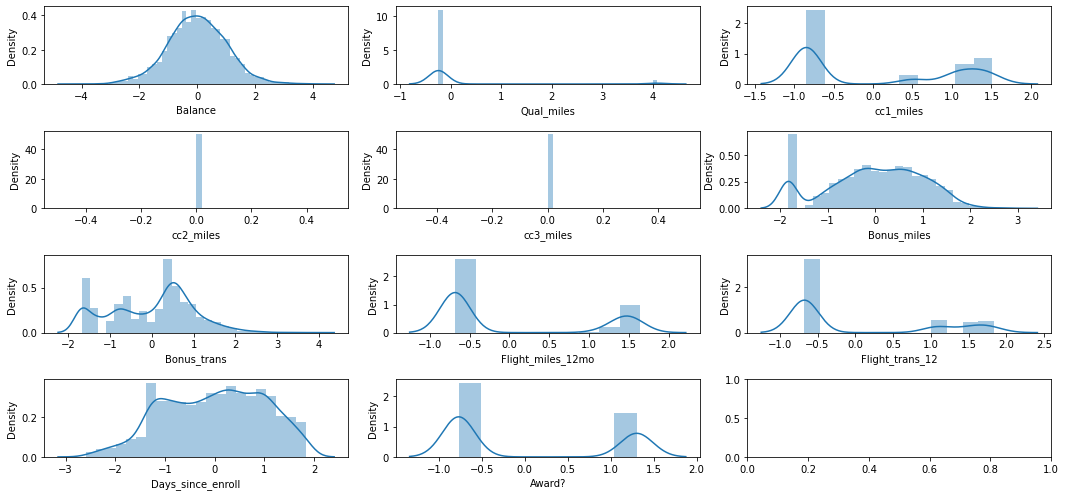

In [12]:
##After the transformation we will see the distribution of the data
fig, ax = plt.subplots(4, 3, figsize=(15,7))
sns.distplot(X.Balance, ax=ax[0,0])
sns.distplot(X.Qual_miles, ax=ax[0,1])
sns.distplot(X.cc1_miles, ax=ax[0,2])
sns.distplot(X.cc2_miles, ax=ax[1,0])
sns.distplot(X.cc3_miles, ax=ax[1,1])
sns.distplot(X.Bonus_miles, ax=ax[1,2])
sns.distplot(X.Bonus_trans, ax=ax[2,0])
sns.distplot(X.Flight_miles_12mo, ax=ax[2,1])
sns.distplot(X. Flight_trans_12, ax=ax[2,2])
sns.distplot(X.Days_since_enroll, ax=ax[3,0])
sns.distplot(X["Award?"] , ax=ax[3,1])
plt.tight_layout()
plt.show()

# Now we will make clusters by using heirarchical clustering 

In [13]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


# We will apply first average linkage method

Text(0.5, 1.0, 'Dendogram')

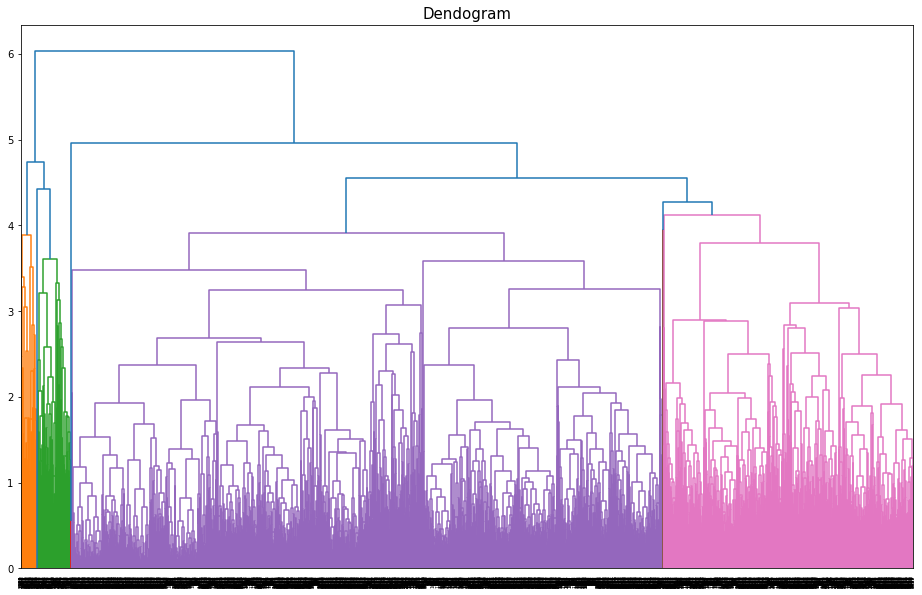

In [14]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(X_transformed, method='average'))
plt.title("Dendogram",size=15)

In [15]:
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [16]:

y_hc1 = hc1.fit_predict(X_transformed)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])

In [17]:
airlines['cluster'] = y_hc1

In [18]:
airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1799.350993,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
1,1,1891.090828,104075.087266,0.000000,2.290294,1.017809,1.016919,23897.578807,15.159394,1291.878896,3.845058,4368.430098,0.547640
2,2,1425.000000,125.000000,0.000000,1.000000,1.000000,1.000000,125.000000,1.000000,125.000000,1.000000,5163.500000,0.000000
3,3,2028.933333,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
4,4,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903


In [19]:
for i in range(5):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 151

cluster 1
Total Members: 1123

cluster 2
Total Members: 2

cluster 3
Total Members: 75

cluster 4
Total Members: 2648



# We will apply now centroid(ward) linkage method

Text(0.5, 1.0, 'Dendogram')

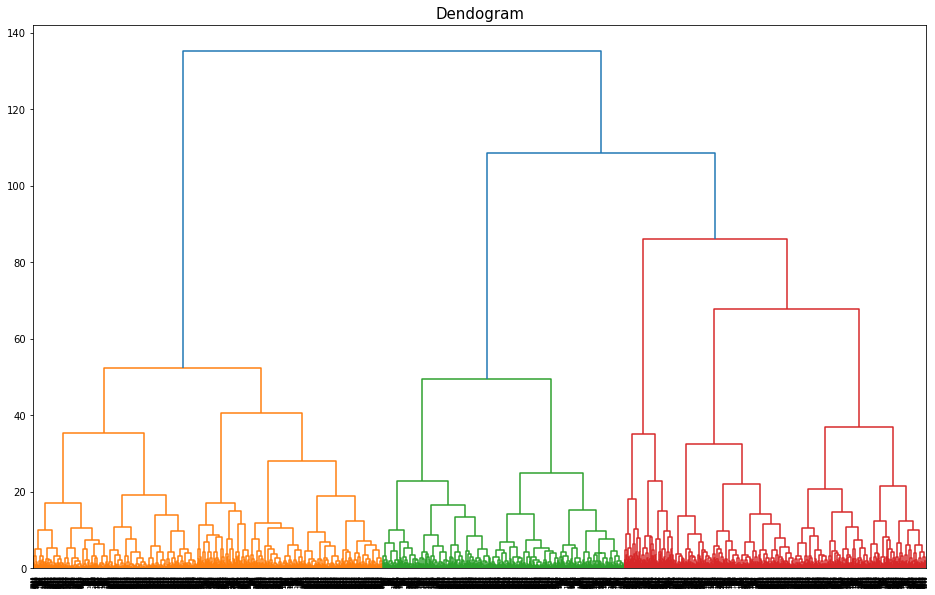

In [20]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(X_transformed, method='ward'))
plt.title("Dendogram",size=15)

In [57]:
hc2 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

In [58]:
y_hc2 = hc2.fit_predict(X_transformed)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])

In [59]:
airlines['cluster'] = y_hc2

In [69]:
airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2270.985322,33419.559030,0.000000,1.000000,1.022336,1.005105,2837.693044,5.463944,0.000000,0.000000,3631.267390,0.151883
1,1,2113.270270,77788.952703,0.000000,1.000000,1.030405,1.000000,6038.932432,8.885135,1403.608108,4.155405,3981.564189,0.429054
2,2,1802.231267,87897.735430,0.000000,3.331175,1.000925,1.018501,29432.774283,15.990749,0.000000,0.000000,4513.629972,0.445883
3,3,1875.539823,133049.712389,2550.061947,2.185841,1.008850,1.008850,24165.995575,15.584071,1720.057522,5.190265,4356.703540,0.646018
4,4,1642.568480,132880.887430,0.000000,3.718574,1.003752,1.035647,43643.870544,22.075047,1163.403377,3.489681,4801.103189,0.677298


In [61]:
for i in range(5):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1567

cluster 1
Total Members: 592

cluster 2
Total Members: 1081

cluster 3
Total Members: 226

cluster 4
Total Members: 533



# We will apply now complete linkage method

Text(0.5, 1.0, 'Dendogram')

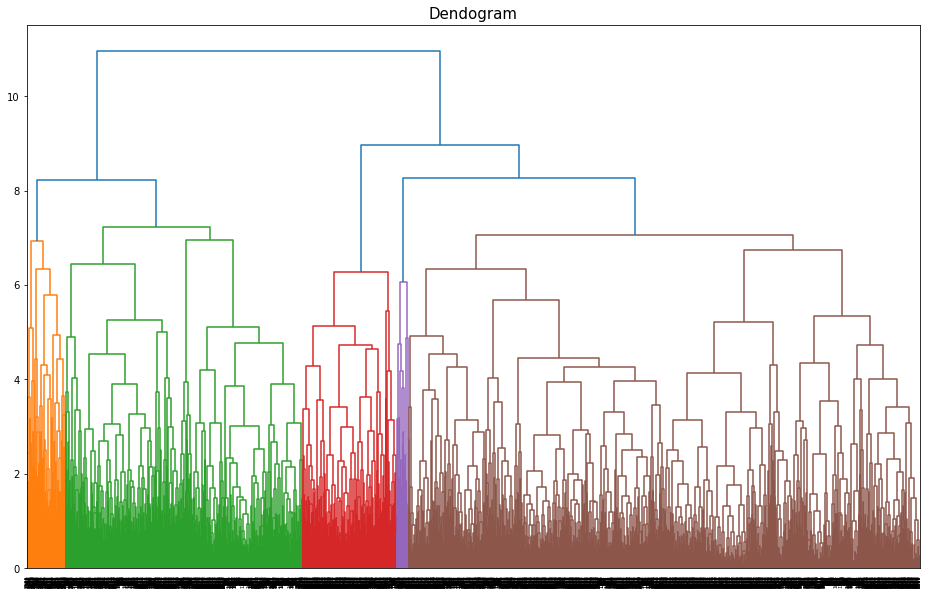

In [62]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(X_transformed, method='complete'))
plt.title("Dendogram",size=15)

In [51]:
hc3 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [52]:
y_hc3 = hc3.fit_predict(X_transformed)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])

In [53]:
airlines['cluster'] = y_hc3

In [54]:
airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1475.911404,145838.029218,0.000000,3.541942,1.004713,1.032045,39928.083883,19.713478,809.139491,2.377003,5095.663525,0.553252
1,1,2168.733392,39231.260927,0.000000,1.506119,1.016608,1.005682,7506.878497,7.910839,53.164773,0.161713,3831.724213,0.220717
2,2,2607.044811,46620.754717,0.000000,1.268868,1.030660,1.000000,8399.268868,9.099057,1110.594340,3.367925,3094.386792,0.573113
3,3,2367.264151,46202.320755,2805.528302,1.000000,1.000000,1.000000,2909.528302,3.962264,188.245283,0.566038,3446.471698,0.264151
4,4,1724.895954,159656.138728,2471.797688,2.549133,1.011561,1.011561,30678.092486,19.144509,2189.341040,6.606936,4635.560694,0.763006


In [55]:
for i in range(5):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1061

cluster 1
Total Members: 2288

cluster 2
Total Members: 424

cluster 3
Total Members: 53

cluster 4
Total Members: 173



# We will apply now single linkage method

Text(0.5, 1.0, 'Dendogram')

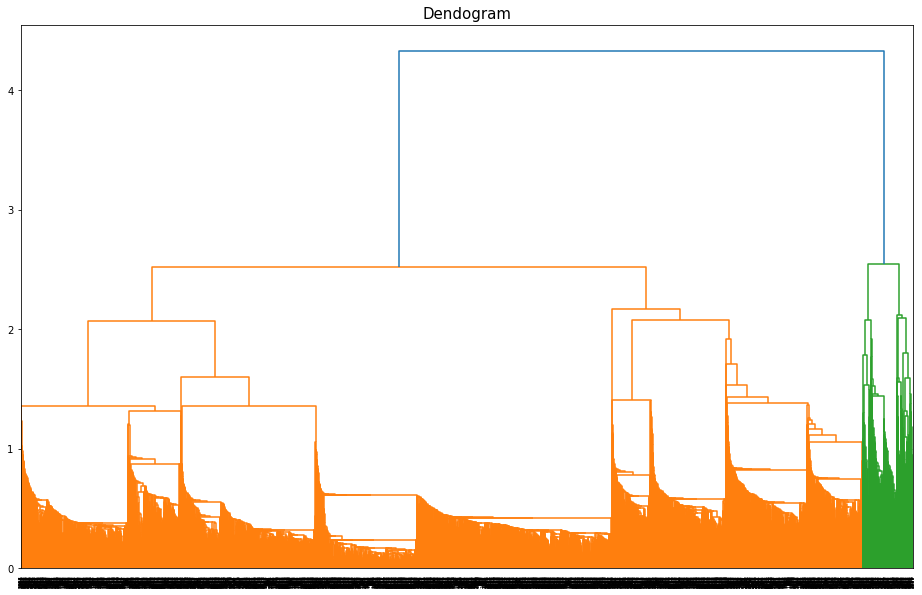

In [32]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(X_transformed, method='single'))
plt.title("Dendogram",size=15)

In [33]:
hc4 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')

In [34]:
y_hc4 = hc4.fit_predict(X_transformed)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])

In [35]:
airlines['cluster'] = y_hc4

In [36]:
airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2028.933333,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
1,1,1799.350993,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
2,2,3018.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5491.000000,18.000000,2116.000000,5.000000,3204.000000,1.000000
3,3,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903
4,4,1889.258897,103982.716192,0.000000,2.289146,1.017794,1.016904,23871.654804,15.131673,1289.069395,3.838968,4370.880783,0.546263


In [37]:
for i in range(5):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 75

cluster 1
Total Members: 151

cluster 2
Total Members: 1

cluster 3
Total Members: 2648

cluster 4
Total Members: 1124



# We will use K-Means clustering method

In [429]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [430]:
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(X_transformed)

KMeans(n_clusters=5, random_state=42)

In [431]:
KM_label=clusters_new.labels_

In [432]:
airlines['cluster'] = clusters_new.labels_

In [433]:
clusters_new.cluster_centers_

array([[ 0.37403024, -0.2447433 ,  0.91648206,  0.        ,  0.        ,
         0.71948703,  0.59467256, -0.68330804, -0.67497033,  0.23678884,
         0.17949748],
       [ 0.01778979, -0.2447433 , -0.81928373,  0.        ,  0.        ,
        -0.27778826, -0.27028379,  1.45194998,  1.43655403, -0.09405415,
         0.07368197],
       [-0.67430137, -0.23302299, -0.83561528,  0.        ,  0.        ,
        -0.90603367, -0.81736231, -0.6820875 , -0.67378221, -0.30771151,
        -0.51051656],
       [ 0.75398821, -0.2447433 ,  1.11731051,  0.        ,  0.        ,
         1.03767038,  1.04636296,  1.45623817,  1.40977901,  0.35785773,
         0.67137144],
       [ 0.59561724,  4.08591363,  0.06270738,  0.        ,  0.        ,
         0.37140654,  0.40074101,  0.79577474,  0.85126029,  0.15196421,
         0.59498281]])

In [434]:
a=airlines .iloc[:,1:].groupby('cluster').agg(['mean']).reset_index()

In [435]:
for i in range(5):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1177

cluster 1
Total Members: 573

cluster 2
Total Members: 1476

cluster 3
Total Members: 551

cluster 4
Total Members: 222



In [436]:
#Importing the metrics for calculating silhouette score
from sklearn import metrics

In [437]:
#Calculating silhouette score for average linkage method
print(metrics.silhouette_score(X_transformed,y_hc1))

NameError: name 'y_hc1' is not defined

In [438]:
#Calculating silhouette score for centroid(ward) linkage method
print(metrics.silhouette_score(X_transformed,y_hc2))

NameError: name 'y_hc2' is not defined

In [439]:
#Calculating silhouette score for complete linkage method
print(metrics.silhouette_score(X_transformed,y_hc3))

NameError: name 'y_hc3' is not defined

In [440]:
#Calculating silhouette score for single linkage method
print(metrics.silhouette_score(X_transformed,y_hc4))

NameError: name 'y_hc4' is not defined

In [441]:
#Calculating silhouette score for K Means method
print(metrics.silhouette_score(X_transformed,clusters_new.labels_))

0.32521670433834216


# Conclusion:-After applying of different type of hierarchical clustering & Kmeans method we found that kmeans clustering is sensitive for outlier but giving high silhouette score & hierarchical clusterical are way more complex to understable & centroid linkage give better result its silhouette score is similar to kmeans clustering, in heirarchical cluster other linkage method  have biased clustering means 70% data is belongs to only one cluster so we are predict the result only kmeans clustering

# 5 clusters are perfect for making infrences on the data

# We can see cluster 3 have way more higher mean in all prospectives except only qualifying as a Topflight status & they have 551 members

# Cluster 2 have lower mean in all prospectives but the group is qualifying as a Topflight status & they have 1476 members

# And other cluters have average result in all prospectives

In [442]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [453]:
airlines=pd.read_csv("D:\\Data sets\\EastWestAirlines.csv")

In [454]:
airlines1=airlines.drop("ID#",axis=1)

In [455]:
array=airlines1.values

In [456]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [457]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [458]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [459]:
dbscan = DBSCAN(eps=1, min_samples=8)
db =dbscan.fit(X)

In [460]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [461]:
data=pd.concat([airlines,cl],axis=1)
data.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1708.595313,174568.814062,880.715625,2.667187,1.073438,1.076563,37807.162500,21.151563,2053.550000,5.932812,4707.593750,0.665625
1,0,2187.980811,52629.739206,2.455299,1.655037,1.000000,1.000000,8975.535107,8.412124,112.624945,0.371566,3790.366768,0.000000
2,1,1815.585782,58403.466351,6.659716,2.581043,1.000000,1.000000,22452.773460,12.739336,253.072986,0.798104,4489.313744,1.000000
3,2,2843.545455,28365.363636,0.000000,1.000000,2.000000,1.000000,8825.272727,11.818182,22.727273,0.181818,2702.000000,0.000000


In [462]:
for i in range(-1,8):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(data[data['cluster'] == i]['ID#'].values)))
    print()

cluster -1
Total Members: 640

cluster 0
Total Members: 2293

cluster 1
Total Members: 1055

cluster 2
Total Members: 11

cluster 3
Total Members: 0

cluster 4
Total Members: 0

cluster 5
Total Members: 0

cluster 6
Total Members: 0

cluster 7
Total Members: 0



In [463]:
print(metrics.silhouette_score(X,dbscan.labels_))

0.22130759895575577


#### 

In [464]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_noise_

640

In [465]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0,0.5, 0.75, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)